In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
import pandas as pd

In [2]:
dataset = pd.read_csv("QtdVendaWinsorized.csv",sep=";");
dataset.columns = ['Data','QtdVendas','QtdVendasWin']
dataset['Data']= pd.to_datetime(dataset['Data'],format='%Y/%m/%d')

dataset['QtdVendas'] = pd.to_numeric(dataset.QtdVendas)
dataset['QtdVendasWin'] = pd.to_numeric(dataset.QtdVendasWin)


dataset= dataset.sort_values(['Data'])


In [3]:
# CRIANDO  DATAFRAME

range = dataset.Data
df=pd.DataFrame(index = dataset.Data)

dataset['QtdVendas'].reset_index(drop=True, inplace=True)
dataset['QtdVendasWin'].reset_index(drop=True, inplace=True)


df['QtdVendas'] = dataset['QtdVendas'].values
df['QtdVendasWin'] = dataset['QtdVendasWin'].values


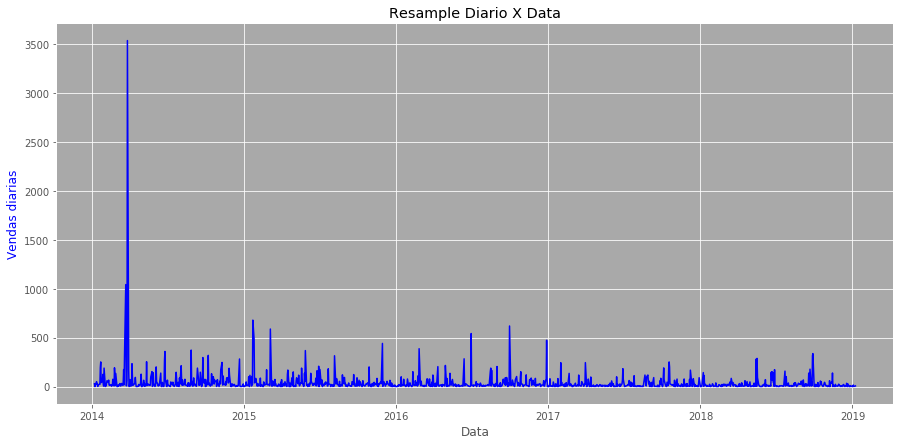

In [5]:
################### plot diario ############ 
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(df.index, df['QtdVendas'], 'b-')
plt.title('Resample Diario X Data') #adicionando o título

ax1.set_xlabel('Data')
ax1.set_ylabel('Vendas diarias', color='b')
ax1.set_facecolor('#A9A9A9')

plt.show()
plt.rcParams['figure.figsize'] = (15,7)

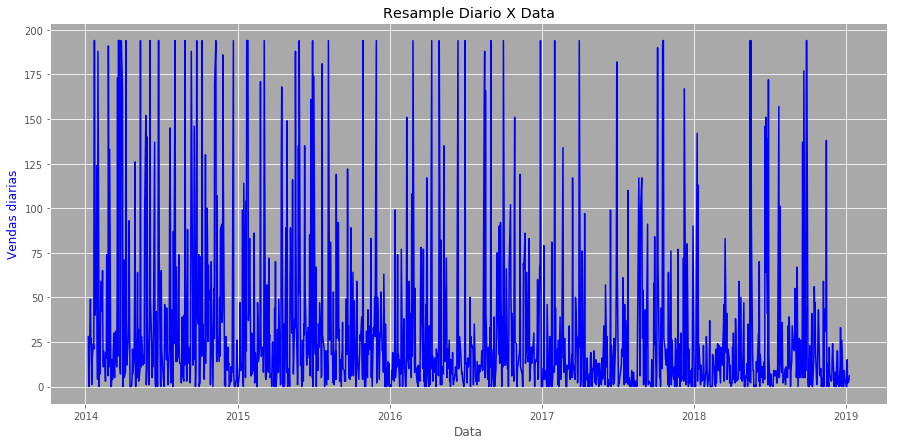

In [6]:
################### plot diario ############ 
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(df.index, df['QtdVendasWin'], 'b-')
plt.title('Resample Diario X Data') #adicionando o título

ax1.set_xlabel('Data')
ax1.set_ylabel('Vendas diarias', color='b')
ax1.set_facecolor('#A9A9A9')

plt.show()
plt.rcParams['figure.figsize'] = (15,7)

In [7]:
##### CHECANDO SE A SERIE É ESTACIONARIA
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df['QtdVendasWin'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
 
############ A SERIE É ESTACIONARIA, POIS O P-VALUE < 0.05

ADF Statistic: -31.438545
p-value: 0.000000


In [8]:
####   ADF STATISTIC NEGATIVE: Running the example prints the test statistic value of -4.8. The more negative this statistic, 
#the more likely we are to reject the null hypothesis (we have a stationary dataset).
pValue = result[1]
print('{:e}'.format(pValue))
if( pValue == 0 ):
    print(" ")

0.000000e+00
 


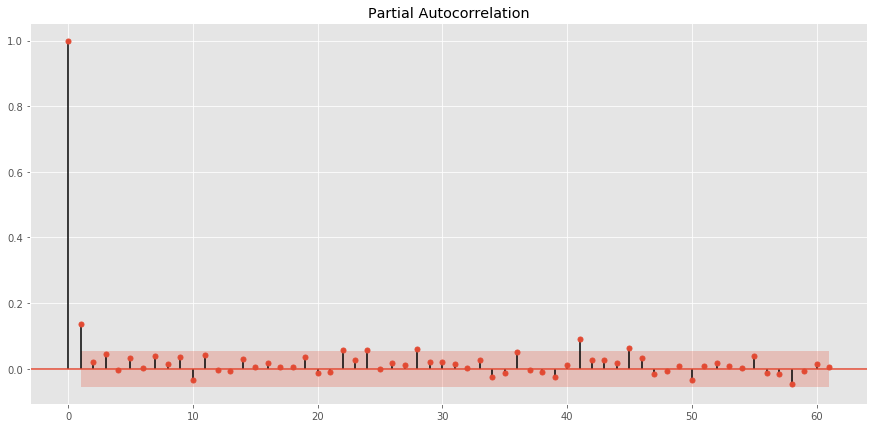

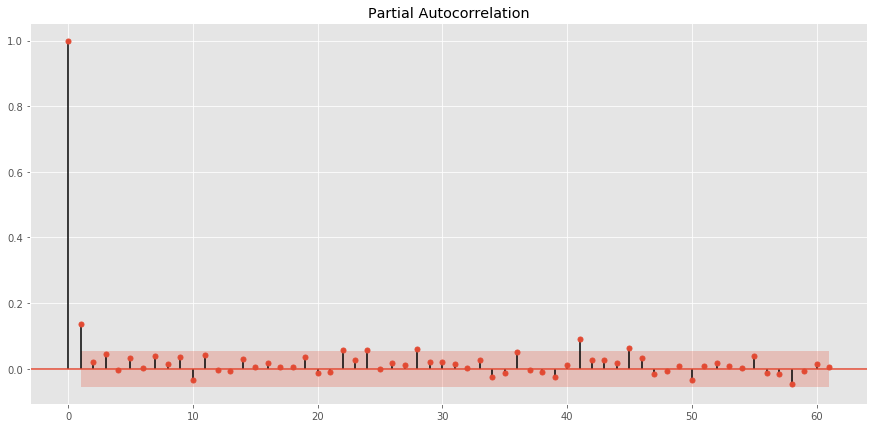

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['QtdVendasWin'], lags=61)

In [13]:
df.shape

(1305, 2)

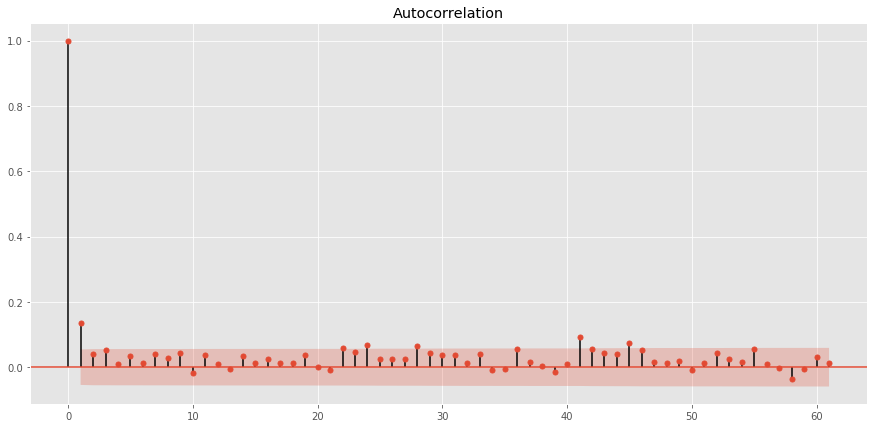

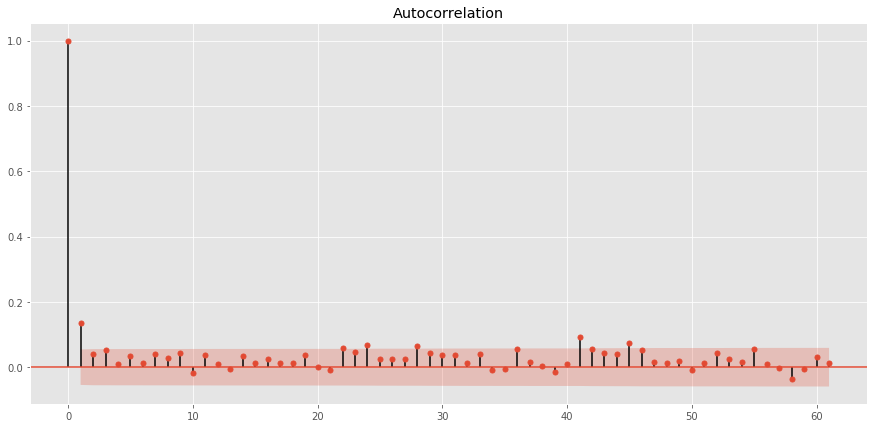

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['QtdVendasWin'], lags=61)

## Arima MODEL

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
from statsmodels.tsa.stattools import acf
# há 261 observações no resample semanal  (235 = 90% train) e (26 = 10% test)
# Create Training and Test
train = df.QtdVendasWin[:1175]
test = df.QtdVendasWin[1175:]

In [14]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(2, 1, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

C:\Users\Anthony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\Anthony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Anthony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


12305.754408011875


In [15]:
predictions= model_arima_fit.forecast(steps=130)[0]
#predictions

In [16]:
predictions.sum()

2297.827840453907

In [18]:
import itertools

#del range
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
#pdq


In [30]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 12347.808535912312
(0, 0, 1) 12330.083384267942
(0, 0, 2) 12330.987579590881
(0, 0, 3) 12331.265824892896
(0, 0, 4) 12333.175830424272
(0, 1, 0) 12985.115729426918
(0, 1, 1) 12315.284224485702
(0, 1, 2) 12303.359122545444
(0, 2, 0) 14221.08621726037
(0, 2, 1) 12984.126167886447
(1, 0, 0) 12329.033984627004
(1, 0, 1) 12330.112623788329
(1, 1, 0) 12726.1910488391
(1, 1, 1) 12303.180349708971
(1, 1, 2) 12305.175234944341
(1, 1, 3) 12306.183961743103
(1, 1, 4) 12306.963309016468
(1, 2, 0) 13614.95443911446
(2, 0, 0) 12330.448258147862
(2, 0, 1) 12317.759969222381
(2, 0, 2) 12331.68528472455
(2, 1, 0) 12606.137672159515
(2, 1, 1) 12305.17586051947
(2, 1, 2) 12305.754408011875
(2, 1, 3) 12308.510576862573
(2, 1, 4) 12304.01722141232
(2, 2, 0) 13289.426895115808
(3, 0, 0) 12331.405756370285
(3, 0, 1) 12331.725031066813
(3, 0, 2) 12333.690495495688
(3, 0, 3) 12331.416776271595
(3, 1, 0) 12556.394339576324
(3, 1, 1) 12307.058337225222
(3, 1, 2) 12307.110246967633
(3, 1, 3) 12303.99751

## Aplicando e comparando os melhores modelos - (3,1,3),(4,1,1),(2,1,4),(1,1,1)

In [19]:
##################### melhor modelo ##############################
 
model = ARIMA(train, order=(2, 1, 4))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(130, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)



C:\Users\Anthony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\Anthony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


In [21]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mae': mae, 
            'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fc, test.values)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


{'mae': 19.797901775592887,
 'rmse': 36.21212160351944,
 'corr': 0.13388497911234779}

In [33]:
#fc_series.sum() #2300,82
test.sum()

2771

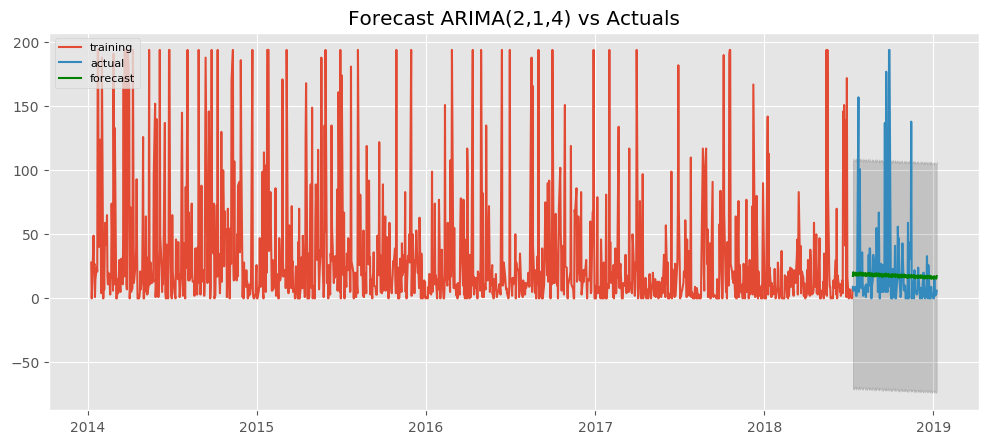

In [24]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast', color = 'g')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast ARIMA(2,1,4) vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

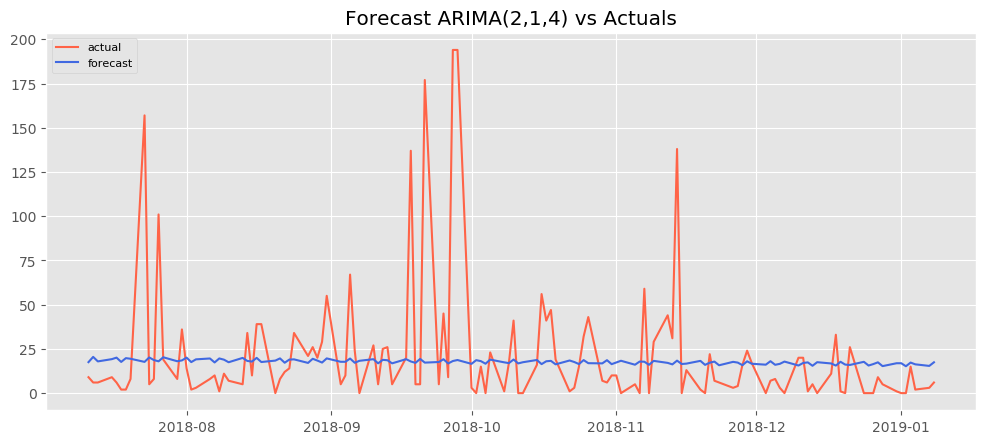

In [25]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test, label='actual',color ='tomato')
plt.plot(fc_series, label='forecast', color = 'royalblue')
#plt.fill_between(train_labels.index, train_labels, test_labels, #color='k', alpha=.15)
plt.title('Forecast ARIMA(2,1,4) vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Modelo MA

In [34]:
##################### melhor modelo ##############################
 
model = ARIMA(train, order=(0, 0, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(130, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)



C:\Users\Anthony\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


In [35]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mae': mae, 
            'rmse':rmse, 
            'corr':corr})

forecast_accuracy(fc, test.values)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


{'mae': 27.352589126796193,
 'rmse': 37.77351537878334,
 'corr': 0.03620816940366283}

In [36]:
fc_series.sum()

4188.336777959554

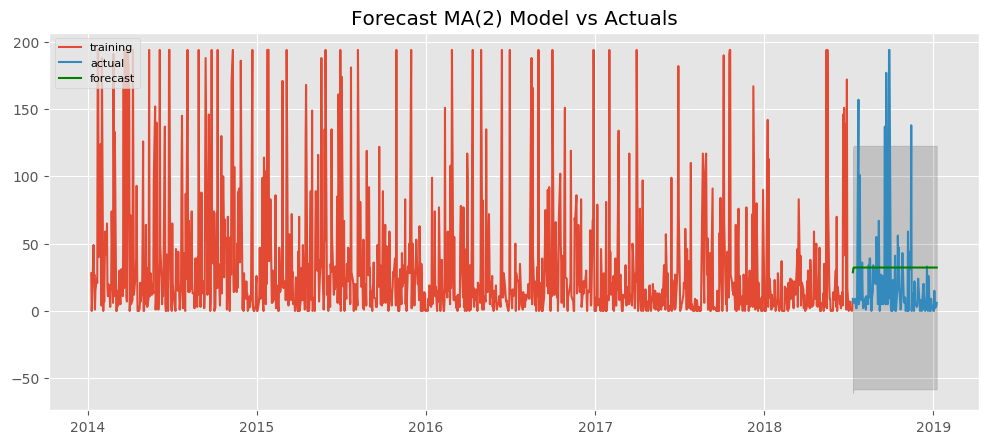

In [37]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast', color = 'g')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast MA(2) Model vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

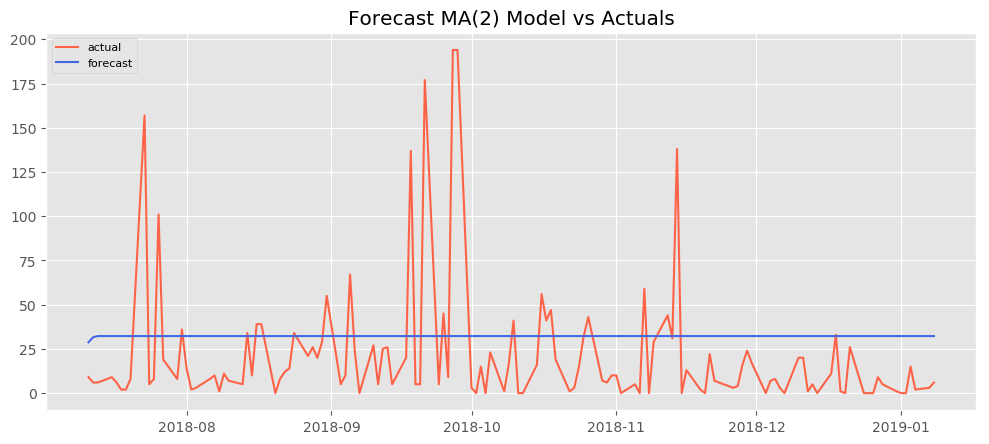

In [38]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test, label='actual',color ='tomato')
plt.plot(fc_series, label='forecast', color = 'royalblue')
#plt.fill_between(train_labels.index, train_labels, test_labels, #color='k', alpha=.15)
plt.title('Forecast MA(2) Model vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()